Kaggle - Youtube Trending Video Dataset (updated daily)의 유튜브 인기영상 데이터 

**Coulumns**

* Video_id
* channelld
* categoryId
* title
* channelTtitle
* publishedAt
* trending_date
* tags
* view_count
* likes
* dislikes
* comment_count


**가정**
1.	한국에서 유튜브 채널을 시작하려함
2.	채널의 방향을 어떻게 잡아야 인기 동영상에 갈 수 있을지 알아보고자 함


**궁금한 것**
1. 인기 동영상의 기준은 무엇인가
2. 현재 인기동영상의 전반적인 상황은 어떠한가
    1. View_count
    2. Likes
    3. Dislikes
    4. Comment_count
    5. Tag_count
    6. Ratio
    7. Title_length
    8. Description_length
    9. 하루 평균 인기 동영상의 개수
    10. 게시되고 어느정도 지나서 인기 영상에 갔는가?
    11. Category 별 동영상의 수
    12. 채널 별 상황은 어떠한가


### **전처리**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import timedelta

pd.options.display.float_format = "{:.2f}".format #pandas 출력 포맷팅 참고(https://financedata.github.io/posts/pandas-display-format.html)

%matplotlib inline

In [6]:
data = pd.read_csv("data_set\KR_youtube_trending_data.csv\KR_youtube_trending_data.csv", engine = "python")
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139554 entries, 0 to 139553
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           139554 non-null  object
 1   title              139554 non-null  object
 2   publishedAt        139554 non-null  object
 3   channelId          139554 non-null  object
 4   channelTitle       139554 non-null  object
 5   categoryId         139554 non-null  int64 
 6   trending_date      139554 non-null  object
 7   tags               139554 non-null  object
 8   view_count         139554 non-null  int64 
 9   likes              139554 non-null  int64 
 10  dislikes           139554 non-null  int64 
 11  comment_count      139554 non-null  int64 
 12  thumbnail_link     139554 non-null  object
 13  comments_disabled  139554 non-null  bool  
 14  ratings_disabled   139554 non-null  bool  
 15  description        135985 non-null  object
dtypes: bool(2), int64(5)

전체 데이터는 139554개 column은 15개 있습니다.
description은 결측치가 있는 행이 있네요.

**video_id**

In [8]:
df = data[:]

for col in ["thumbnail_link", "comments_disabled", "ratings_disabled" ]: #해당 분석에서 사용하지 않아 삭제
    del df[col] # 컬럼 삭제
    

video_id가 동영상의 고유값인지 확인해보겠습니다.

In [9]:
df["video_id"].duplicated().value_counts()

True     122446
False     17108
Name: video_id, dtype: int64

In [10]:
df = df.drop_duplicates(["video_id"])[:]

동영상이 여러 일자에 인기동영상이 될 경우, 일자별로 데이터가 생겼습니다.
이번 분석에서는, 해당 기간동안 처음으로 인기동영상이 되었을 때의 데이터로만 분석을 진행하겠습니다.
중복된 video_id를 제거.

In [11]:
df["video_id"].duplicated().value_counts()

False    17108
Name: video_id, dtype: int64

**category_id & category**

category_id와 json 파일을 사용하여 텍스트로 된 category 열을 생성합니다.

In [12]:
id_to_category = {}

with open("data_set\KR_youtube_trending_data.csv\KR_category_id.json","r") as f:
    id_data = json.load(f)
    for category in id_data["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]

# id_to_category

df["categoryId"] = df["categoryId"].astype(str)
df.insert(4, "category", df["categoryId"].map(id_to_category))

In [13]:
df.isnull().sum()

video_id           0
title              0
publishedAt        0
channelId          0
category          32
channelTitle       0
categoryId         0
trending_date      0
tags               0
view_count         0
likes              0
dislikes           0
comment_count      0
description      458
dtype: int64

생성한 category 열에 결측치가 있는 사례가 있습니다.

In [14]:
df["categoryId"].loc[df["category"].isnull() == True].value_counts()

29    32
Name: categoryId, dtype: int64

확인해보니 category_id가 29번인 경우 매칭이 안됐네요  
json파일을 확인해보니 29번이 없습니다.

그래서 category_id가 29번인 영상을 직접 찾아 확인해보니 카테고리가 "비영리/사회운동"이네요.  
category의 결측치를 "Nonprofits & Activism" 으로 채워줍니다.

In [15]:
df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"

C:\Users\bigdata\AppData\Local\Temp\ipykernel_15128\2824784033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"


**trending_date & publish_time**

In [16]:
data["trending_date"] = data["trending_date"].str[:10]
df["publishedAt"] = df["publishedAt"].str[:10]

In [17]:
data["trending_date"]

0         2020-08-12
1         2020-08-12
2         2020-08-12
3         2020-08-12
4         2020-08-12
             ...    
139549    2022-07-21
139550    2022-07-21
139551    2022-07-21
139552    2022-07-21
139553    2022-07-21
Name: trending_date, Length: 139554, dtype: object

In [18]:
df["publishedAt"]

0         2020-08-09
1         2020-08-12
2         2020-08-10
3         2020-08-11
4         2020-08-11
             ...    
139383    2022-07-20
139384    2022-07-20
139385    2022-07-20
139386    2022-07-20
139388    2022-07-20
Name: publishedAt, Length: 17108, dtype: object

분석에 사용하기 위하여 trending_date & publish_time를 datetime 형식으로 바꿔줍니다.

In [19]:
data["trending_date"] = pd.to_datetime(data["trending_date"])

df["trending_date"] = pd.to_datetime(df["trending_date"])
df["trending_date"] = df["trending_date"].apply(lambda x : x.date()) 
df["trending_date"] = pd.to_datetime(df["trending_date"])

df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df["publishedAt"] = df["publishedAt"].apply(lambda x : x.date()) 
df["publishedAt"] = pd.to_datetime(df["publishedAt"]) 

**tags & tag_count**

In [20]:
df["tag_count"] = df["tags"].apply(lambda x : len(x.split("|")) if x != "[none]" else 0)

**Ratio (likes/view_count, dislikes/view_count, comment_count/view_count, dislikes/likes)**

조회수 대비 좋아요 비율  
조회수 대비 싫어요 비율  
조회수 대비 댓글수 비율  
좋아요 대비 싫어요 비율  
을 알아보기 위하여 변수 생성  

In [21]:
df["likes/view_count"] = df["likes"] / df["view_count"]
df["dislikes/view_count"] = df["dislikes"] / df["view_count"]
df["comment_count/view_count"] = df["comment_count"] / df["view_count"]
df["dislikes/likes"] = df["dislikes"] / df["likes"]

In [22]:
df.isnull().sum()

video_id                      0
title                         0
publishedAt                   0
channelId                     0
category                      0
channelTitle                  0
categoryId                    0
trending_date                 0
tags                          0
view_count                    0
likes                         0
dislikes                      0
comment_count                 0
description                 458
tag_count                     0
likes/view_count              1
dislikes/view_count           1
comment_count/view_count      1
dislikes/likes              275
dtype: int64

In [23]:
df['likes/view_count'] = df['likes/view_count'].fillna(0)
df['dislikes/view_count'] = df['dislikes/view_count'].fillna(0)
df['comment_count/view_count'] = df['comment_count/view_count'].fillna(0)
df["dislikes/view_count"] = df["dislikes/view_count"].fillna(0)

df["dislikes/likes"].loc[df["dislikes/likes"].isnull() == True] = 0

C:\Users\bigdata\AppData\Local\Temp\ipykernel_15128\4065836462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dislikes/likes"].loc[df["dislikes/likes"].isnull() == True] = 0


In [24]:
df.isnull().sum()

video_id                      0
title                         0
publishedAt                   0
channelId                     0
category                      0
channelTitle                  0
categoryId                    0
trending_date                 0
tags                          0
view_count                    0
likes                         0
dislikes                      0
comment_count                 0
description                 458
tag_count                     0
likes/view_count              0
dislikes/view_count           0
comment_count/view_count      0
dislikes/likes                0
dtype: int64

**title & title_length**

In [25]:
df["title_length"] = df["title"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )

title의 길이로 title_lenght 열을 생성했습니다.

**description & description_length**

In [26]:
df["description_length"] = df["description"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )

description의 길이로 description_length 열을 생성했습니다.

**treTime-pubTime**

In [27]:
df["treTime-pubTime"] = df["trending_date"] - df["publishedAt"] + timedelta(days = 1) 

동영상 게시 후 얼마 후에 인기동영상에 갔는지를 의미하는 treTime-pubTime입니다.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17108 entries, 0 to 139388
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   video_id                  17108 non-null  object         
 1   title                     17108 non-null  object         
 2   publishedAt               17108 non-null  datetime64[ns] 
 3   channelId                 17108 non-null  object         
 4   category                  17108 non-null  object         
 5   channelTitle              17108 non-null  object         
 6   categoryId                17108 non-null  object         
 7   trending_date             17108 non-null  datetime64[ns] 
 8   tags                      17108 non-null  object         
 9   view_count                17108 non-null  int64          
 10  likes                     17108 non-null  int64          
 11  dislikes                  17108 non-null  int64          
 12  com

In [80]:
df2 = df[df["publishedAt"] > '2021-01-01']
df2

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,comment_count,description,tag_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,title_length,description_length,treTime-pubTime
24762,ojahoYw9zpY,[동충하초] 동충이의 첫연애,2021-01-02,UC6u3fosnyufBiUiS3w609zw,Film & Animation,키에커,1,2021-01-02,[None],517489,...,3662,(목소리 특별출연)루아/언니 : 이용신문의 : rlaalsdn8855@naver.com,1,0.03,0.00,0.01,0.03,15,48,1 days
24763,jRivNZ9N4wI,[선공개] 모든 아이돌의 우상! 비(RAIN)를 향한 박진영(J.Y. Park)의 ...,2021-01-02,UCFL1sCAksD6_7JIZwwHcwjQ,Entertainment,JTBC Entertainment,24,2021-01-02,아는 형님|형님|형님 학교|예능|안무|안무지적|깡|선공개|kpop|버즈|강호동|이수...,676759,...,1034,[선공개] 모든 아이돌의 우상! 비를 향한 박진영의 독설🔥 ＂안무가 약간... 조잡...,33,0.01,0.00,0.00,0.03,93,85,1 days
24767,tR7p6qapD1Y,"여자 아이돌 시구 1등, 에이핑크 보미의 실제 야구 실력 놀랍네요ㄷㄷ",2021-01-02,UC270ueFEsQ21S26TYI_9yVA,Sports,야신야덕,17,2021-01-02,야신야덕|빡코|스포츠|야구|프로야구|에이핑크|보미|마녀들,587543,...,622,★ 본 촬영은 사회적 거리두기 2.5단계 시행 이전에 방역수칙을 철저히 준수하며 진...,8,0.01,0.00,0.00,0.02,38,158,1 days
24768,0wUIH78Y-Aw,가수를 마술을 써서 이겨보라고!? 마술사가 가수를 노래로 이기는 기상천외한 방법 - 니키,2021-01-02,UC2qjHK7wWxzb8mF9lgf7uXQ,Entertainment,NICKY니키,24,2021-01-02,마법|마법사|마술배우기|마술해법|카드마술|동전마술|마술기초|쉬운마술|니키|니키양|이...,73598,...,526,▶마술 도구를 구매하고 싶을 땐? 니키아티브샵! - https://smartstor...,35,0.02,0.00,0.01,0.04,49,897,1 days
24773,BYlAQaeqDo0,"Pray (with 총몇명, 릴리세은)",2021-01-02,UCWhiqHa4dVohOTSUQwK-l2g,Entertainment,빨간내복야코,24,2021-01-02,#병맛노래|#병맛송|#웃긴노래,312474,...,6238,본 영상은 유튜버 총몇명님과 릴리세은님이 함께 해주셨습니다.총몇명 유튜브 : htt...,3,0.05,0.00,0.02,0.01,21,418,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139383,L1DlzBANW1M,태현💘시은 동상이몽 컴백! 둘째 임신 소식과 함께 찾아온 레전드 부부💑 [동상이몽|...,2022-07-20,UCy-swBYpRZx7KW11FStjTgw,Entertainment,레알예능 스브스,24,2022-07-21,미운우리새끼|미우새|MyLittleOldBoy|신발벗고 돌싱포맨|동상이몽|Youar...,468081,...,294,허니하니 컴백🥰#동상이몽 #You_are_My_Destiny #진태현 #박시은☞ 매...,19,0.01,0.00,0.00,0.00,59,60,2 days
139384,9ik1Ip4bdNc,A Cappella Group Maytree Surprises The Judges ...,2022-07-20,UCT2X19JJaJGUN7mrYuImANQ,Entertainment,America's Got Talent,24,2022-07-21,Simon Cowell|Terry Crews|America's Got Talent|...,974882,...,2153,A cappella stars Maytree will take you down me...,30,0.05,0.00,0.00,0.00,76,1563,2 days
139385,U6y7Slf3TeE,[결승/7세트] 김민아 vs. 스롱 피아비 I 하나카드 LPBA 챔피언십,2022-07-20,UCuXTHFVxa6tPC_jmqwpyOUA,Sports,PBA TV,17,2022-07-21,당구|billiards|프로당구|pba|lpba|당구레슨|3쿠션|4구|포켓볼|스포츠...,213015,...,435,[결승/7세트] #김민아 vs. #스롱 #피아비 I 하나카드 LPBA 챔피언십프로...,48,0.01,0.00,0.00,0.00,40,195,2 days
139386,CQuHOYZXY7c,[이상한변호사우영우 | EP7 | 하이라이트] 준호씨를 제가 한번 만져봐도 되겠습니...,2022-07-20,UCk8I64dalAiQkgAkcQocDcw,Entertainment,에이스토리 ASTORY,24,2022-07-21,에이스토리|ASTORY,647437,...,1580,#이상한_변호사_우영우 7부 하이라이트#이상한변호사우영우 #박은빈 #강태오 #강기영...,2,0.00,0.00,0.00,0.00,78,348,2 days


In [82]:
df2.to_csv("data_set\KR_youtube_trending_data.csv\KR_youtube_trending_data1.csv")

### 분석

#### 현재 인기 동영상의 전반적인 상황은 어떠한가

In [31]:
print("분석에 사용한 데이터는 {}개의 변수를 가진 인기동영상 데이터 {}개입니다.".format(len(df.columns), format(len(df),",")))

분석에 사용한 데이터는 22개의 변수를 가진 인기동영상 데이터 17,108개입니다.


In [32]:
df.describe()

,view_count,likes,dislikes,comment_count,tag_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,title_length,description_length,treTime-pubTime
count,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108.00,17108
mean,783897.15,49074.98,499.36,5340.40,19.16,inf,inf,inf,0.03,44.47,389.04,2 days 06:05:08.066401683
std,2198325.70,236034.40,5102.65,52343.61,19.24,NaN,NaN,NaN,0.16,22.69,465.89,0 days 22:19:45.088500273
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1 days 00:00:00
25%,179512.50,3806.75,0.00,396.00,5.00,0.01,0.00,0.00,0.00,27.00,124.00,2 days 00:00:00
50%,353212.50,7713.00,86.00,923.00,13.00,0.02,0.00,0.00,0.01,41.00,267.00,2 days 00:00:00
75%,721387.25,17946.75,215.00,2245.25,27.00,0.04,0.00,0.01,0.03,59.00,479.00,2 days 00:00:00
max,76805026.00,7110450.00,405428.00,3400571.00,144.00,inf,inf,inf,7.54,100.00,4920.00,23 days 00:00:00


view_count, likes, dislikes, comment_count, description_length 다섯가지 항목은 최소값 항목을 살펴보니 0인 사례들이 있습니다.  
각 항목 별로 view_count를 제외하고 확인해보았으나 데이터에 오류는 없었습니다.
view_count는 0인 영상이 두개가 있었는데 아래에서 확인해보겠다.

그외에 해당 항목들은 인기동영상이 되는 것에 영향을 주지 않거나, 영향이 작은 것으로 판단할 수 있습니다.  
위의 다섯가지 항목에서 파생한 likes/view_count, dislikes/view_count, comment_count/view_count, dislikes/likes 항목들도 마찬가지로 영향이 크지 않을 것입니다.

view_count 중점적으로 탐색하고, 나머지 항목들은 간단하게 살펴보겠습니다.

*title_length를 제외한 나머지 항목은 평균값과 최대값의 차이가 크기 때문에, 극단적으로 높은 값들을 제외하면 실제 평균은 다소 낮아질 가능성이 있습니다.

In [33]:
df["likes/view_count"].replace(np.inf, 0, inplace = True)
df["dislikes/view_count"].replace(np.inf, 0, inplace = True)
df["comment_count/view_count"].replace(np.inf, 0, inplace = True)

In [34]:
index1 = df[df["view_count"] == 0].index
index1

Int64Index([24599, 46777], dtype='int64')

In [35]:
df.loc[24599]

video_id                                                          gNfxYzW-wME
title                             Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020
publishedAt                                               2020-12-31 00:00:00
channelId                                            UCOH52Yqq4-rdLvpt2Unsqsw
category                                                        Entertainment
channelTitle                                                    YouTube Korea
categoryId                                                                 24
trending_date                                             2021-01-01 00:00:00
tags                        YouTube Originals|YouTube|Hello 2021 Korea|ful...
view_count                                                                  0
likes                                                                    2052
dislikes                                                                   63
comment_count                                                   

In [36]:
df.loc[46777]

video_id                                                          hAxqygRdM4g
title                                                   Earth Day 2021 Doodle
publishedAt                                               2021-04-21 00:00:00
channelId                                            UCdq61m8s_48EhJ5OM_MCeGw
category                                                     Film & Animation
channelTitle                                                    GoogleDoodles
categoryId                                                                  1
trending_date                                             2021-04-22 00:00:00
tags                                                                   [None]
view_count                                                                  0
likes                                                                       0
dislikes                                                                    0
comment_count                                                   

view_count가 0인개 두개 있는데 확인해보니, YouTube Korea와, GoogleDoodles 채널의 영상이었다.  
이건 유튜브 자체적으로 인기영상에 올린듯 하다.

In [37]:
df['likes/view_count']

0        0.01
1        0.03
2        0.01
3        0.02
4        0.10
         ... 
139383   0.01
139384   0.05
139385   0.01
139386   0.00
139388   0.09
Name: likes/view_count, Length: 17108, dtype: float64

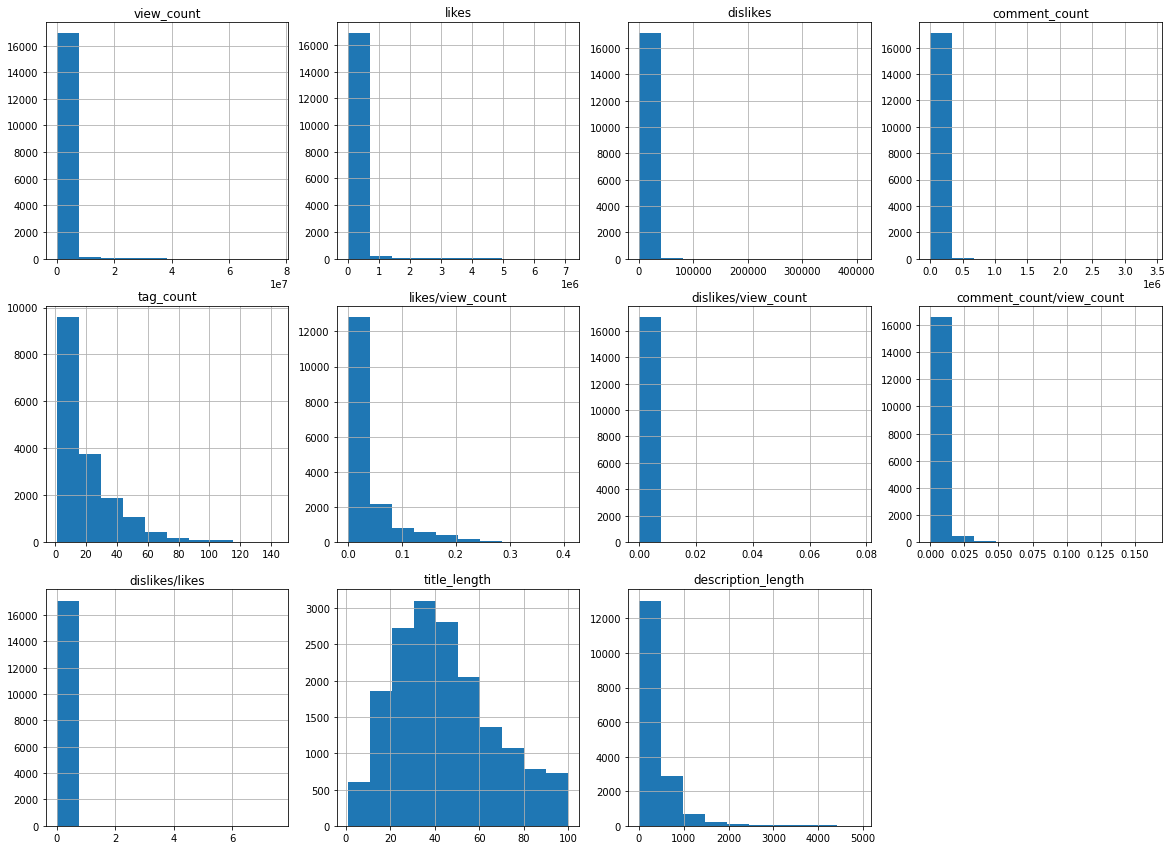

In [38]:
plt.figure(figsize = (20, 20))
for i in range(len(df.describe().columns) - 1 ):
    plt.subplot(4, 4, i+1) # 행, 열, 인덱스
    plt.title(df.describe().columns[i]) 
    plt.hist(df[df.describe().columns[i]],bins = 10) # 밀도 히스토그램
    plt.grid()

In [39]:
def summary_numeric(col):
    print(col)
    print("평균 {:>15}".format(format(df[col].mean(), ",.2f")))
    print("최소 {:>15}".format(format(df[col].min(), ",.2f")))
    print("중앙 {:>15}".format(format(df[col].median(), ",.2f")))
    print("최대 {:>15}".format(format(df[col].max(), ",.2f")))

#### view_count

In [40]:
summary_numeric("view_count")

view_count
평균      783,897.15
최소            0.00
중앙      353,212.50
최대   76,805,026.00


view_count는 수치형 변수 중 최대값의 단위가 가장 큰 항목입니다.  
인기 동영상들은 평균 조회수 353,212건이네요.  
최대 조회수가 억 단위인걸로 봐서 극단값들의 영향이 매우 클 것 같습니다.  

In [41]:
df[["video_id", "title", "channelTitle", "category", "view_count", "likes", "dislikes", "comment_count", "publishedAt", "trending_date"]].sort_values(by = ["view_count"], ascending = [False]).head(3)

,video_id,title,channelTitle,category,view_count,likes,dislikes,comment_count,publishedAt,trending_date
92,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,Cardi B,Music,76805026,2820371,382583,270277,2020-08-07,2020-08-12
52585,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,Music,67111752,7110450,8998,3400571,2021-05-21,2021-05-21
69616,JQxQqdn9dEM,Let's just have fun with your loved ones!😎 #Pe...,BANGTANTV,Music,62125441,4992443,111114,55611,2021-07-30,2021-08-04


조회수 상위 3개를 살펴보겠습니다.  

1위는 Cardi B채널의 Cardi B - WAP feat. Megan Thee Stallion [Official Music Video]라는 뮤직비디오로 게시된지 5일 후 조회수 76,805,026에 도달했네요.  
2위는 BTS (방탄소년단) 'Butter' Official MV로 게시 하루만에 조회수 67,111,752입니다.  
3위는 Let's just have fun with your loved ones!😎 #PermissiontoDance Challenge only on YouTube #Shorts 영상은 쇼츠 영상으로 게시 5일 후 62,125,441입니다.

상위에 해당하는 데이터는 이 정도로 살펴보고, 극단치들을 제외하여 데이터를 살펴보겠습니다.

In [42]:
print("전체 데이터 {}건".format(len(df)) )
print("1000만이상 {}건 전체의 {:.2f}%".format(len(df.loc[df["view_count"] >= 10000000]),len(df.loc[df["view_count"] >= 10000000]) / len(df) * 100))
print("100만이상 {}건 전체의 {:.2f}%".format(len(df.loc[df["view_count"] >= 1000000]),len(df.loc[df["view_count"] >= 1000000]) / len(df) * 100))
print("100만이하 {}건 전체의 {:.2f}%".format(len(df.loc[df["view_count"] < 1000000]),len(df.loc[df["view_count"] < 1000000]) / len(df) * 100))

전체 데이터 17108건
1000만이상 135건 전체의 0.79%
100만이상 2777건 전체의 16.23%
100만이하 14331건 전체의 83.77%


조회수 100만 이상 16.23%를 제외하고 그래프를 확인해보겠습니다.

조회수 100만 이하 데이터의 평균: 351250.92


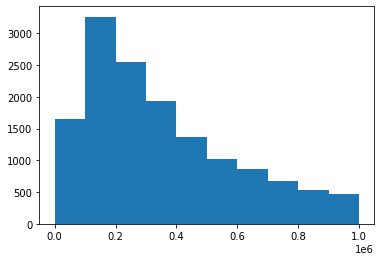

In [43]:
print("조회수 100만 이하 데이터의 평균: {:.2f}".format(df["view_count"].loc[df["view_count"] <= 1000000].mean()))
plt.hist(df["view_count"].loc[df["view_count"] <= 1000000]);

조회수 100만 이상의 데이터 2777건을 제외하니,  
평균 조회수는 351,250건으로 나타나고,  
조회수 0~20만 이하에 많은 영상이 있는 것을 확인할 수 있었습니다.  
  
view_count 한가지 의외인 점은, 최소 조회수를 봤을 때 0의 조회수로도 인기 동영상이 될 수 있다는 것 입니다.  
좀 더 자세히 살펴보겠습니다.  

In [44]:
df.loc[df["view_count"] <= 3000,["video_id", "title", "publishedAt", "trending_date", "category", "view_count", "likes", "comment_count", "tag_count"]].sort_values(by = "view_count")

,video_id,title,publishedAt,trending_date,category,view_count,likes,comment_count,tag_count
24599,gNfxYzW-wME,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,2020-12-31,2021-01-01,Entertainment,0,2052,627,18
46777,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21,2021-04-22,Film & Animation,0,0,0,1


위에서도 언급했다시피, 관련 영상들은 유튜브측에서 임의로 해당일을 기념하는 영상들을 인기에 관계없이 올려놓은것으로 확인된다.  
Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020 -> 연말영상  
Earth Day 2021 Doodle -> 지구의날 영상  

In [45]:
df.loc[df["view_count"] > 0, ["video_id", "title", "publishedAt", "trending_date", "category", "view_count", "likes", "comment_count", "tag_count"]].sort_values(by = "view_count")

,video_id,title,publishedAt,trending_date,category,view_count,likes,comment_count,tag_count
4096,d9NFlVpmPkE,던파 레전드사건이 터졌습니다,2020-09-09,2020-09-10,Gaming,14209,177,110,9
2795,aCdRIUJJmPc,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),2020-09-01,2020-09-01,News & Politics,15225,268,25,82
6465,-vP0KlNDHE8,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",2020-09-26,2020-09-27,News & Politics,15845,1489,47,3
2681,2oAXwkR-Pxk,[2020 K리그] 18R 울산 vs 서울 하이라이트,2020-08-30,2020-08-31,Sports,16772,159,135,5
871,nZDb40xiUto,[싸꼰_LIVE] 사사건건 풀방송 라이브_364일차_0818(화),2020-08-18,2020-08-18,News & Politics,16957,289,49,81
...,...,...,...,...,...,...,...,...,...
2211,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28,2020-08-28,Music,51234434,5913495,1848381,26
1235,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21,2020-08-21,Music,57229275,7046843,2314262,6
69616,JQxQqdn9dEM,Let's just have fun with your loved ones!😎 #Pe...,2021-07-30,2021-08-04,Music,62125441,4992443,55611,1
52585,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21,2021-05-21,Music,67111752,7110450,3400571,6


0조회수인 영상을 제외하고 14209 조회수가 제일 낮은 조회수 영상이다.

#### likes

In [46]:
summary_numeric("likes")

likes
평균       49,074.98
최소            0.00
중앙        7,713.00
최대    7,110,450.00


In [47]:
df[["video_id", "title", "channelTitle", "category", "view_count", "likes", "dislikes", "comment_count", "tag_count", "description_length"]].sort_values(by = ["likes"], ascending = [False]).head(3)

,video_id,title,channelTitle,category,view_count,likes,dislikes,comment_count,tag_count,description_length
52585,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,Music,67111752,7110450,8998,3400571,6,2264
1235,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,57229275,7046843,165473,2314262,6,1929
2211,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,Music,51234434,5913495,405428,1848381,26,2730


간략하게 살펴보면 likes는 평균 49,074, 범위는 0 ~ 7,110,450  
상위 3개의 동영상을 살펴보니 모두 뮤직비디오이고, 방탄2개와 블랙핑크로 해외에서도 인기가 많은 그룹들인 걸로 확인된다.  
52585 항목은 조회수 2위에 해당하는 동영상입니다.  

#### dislikes

In [48]:
summary_numeric("dislikes")

dislikes
평균          499.36
최소            0.00
중앙           86.00
최대      405,428.00


In [49]:
df[["video_id", "title", "channelTitle", "category", "view_count", "likes", "dislikes", "comment_count", "tag_count", "description_length"]].sort_values(by = ["dislikes"], ascending = [False]).head(3)

,video_id,title,channelTitle,category,view_count,likes,dislikes,comment_count,tag_count,description_length
2211,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,Music,51234434,5913495,405428,1848381,26,2730
92,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,Cardi B,Music,76805026,2820371,382583,270277,33,1275
1235,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,Music,57229275,7046843,165473,2314262,6,1929


dislikes는 평균 499, 범위는 0 ~ 405,428  
상위 3개의 동영상을 살펴보니, 좋아요의 경우 처럼 3개 다 뮤비영상이며,   
좋아요가 많으면 싫어요도 그만큼 어느정도의 비율이 따라오게 되는 것 같다.  

#### tag_count

In [50]:
summary_numeric("tag_count")

tag_count
평균           19.16
최소            1.00
중앙           13.00
최대          144.00


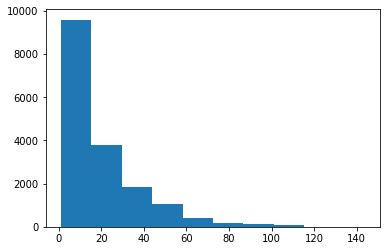

In [51]:
plt.hist(df["tag_count"],bins = 10);

tag_count는 평균 19, 범위는 0 ~ 144  
태그의 개수가 10개 이하인 동영상이 약 9000개 정도 입니다.

In [52]:
df[["video_id", "title", "channelTitle", "category", "view_count", "likes", "dislikes", "comment_count", "tag_count","description_length"]].sort_values(by = ["tag_count"], ascending = [False]).head(10)

,video_id,title,channelTitle,category,view_count,likes,dislikes,comment_count,tag_count,description_length
120985,Ti4vwEjOSY4,생각보다 더 심각한 고은아의 코 상태...,방가네,People & Blogs,174110,2807,0,182,144,664
26167,u3u_nFs31sc,[EP115]※소름주의※두 명의 영혼을 업고 심야신당을 찾아온 이하늘 동생 45RP...,푸하하TV,Entertainment,415325,5841,152,695,135,1023
11719,plDOzQa3sC0,[EP104]※충격※ 기적적으로 하반신 마비를 이겨낸 상담자의 소름돋는 사연은 무엇일까?,푸하하TV,Entertainment,186319,3152,74,224,135,620
10330,xxf-1MCw60Q,[EP102](※실제상황)정호근조차 감당이 안 되는 사주를 갖고 있는 배우 최현호,푸하하TV,Entertainment,114468,2461,65,77,135,556
11513,KX997Kq9KYk,"[EP103](※돌발상황)심야신당 점사 도중 대폭발해버린 개그맨 김기수, 어떤 일이...",푸하하TV,Entertainment,421901,6327,242,478,135,631
24758,IRZYinAXlQo,[EP114]※충격※모든 걸 잃고 한순간에 신용불량자 된 모델 지연수,푸하하TV,Entertainment,584234,10383,281,2173,133,902
33162,zO0JAIg1vDY,"[EP120]※돌발상황※촬영 도중 갑자기 상담자와 함께 눈물을 흘린 정호근,무슨 일...",푸하하TV,Entertainment,230341,5243,104,262,133,562
37372,hp1zD28qSfk,[EP123]※최초공개※정호근의 타로점을 보고 소스라치게 놀란 마술사 최현우,푸하하TV,Entertainment,156550,3260,92,127,133,446
47394,MPO5aopaL7w,[EP130]※충격※차마 입 밖으로 꺼낼 수 없는 일을 당했던 상담자의 소름 돋는 사연,푸하하TV,Entertainment,255077,3808,89,254,132,416
28975,UG7SOWPwiiE,[EP117]※최초고백※한동안 연예인들을 피해 다녀야만 했던 DJ DOC 정재용의 ...,푸하하TV,Entertainment,209530,3408,98,299,131,966


상위 10개까지 살펴보니, 1위를 제외하고 2~10위는 모두 푸하하TV 채널에서 게시한 동영상입니다.  
해당 채널은 태그의 개수를 많이 사용하는 경향이 있는 것 같습니다.

#### Ratio (likes/view_count, dislikes/view_count, comment_count/view_count, dislikes/likes)

In [53]:
df[["likes/view_count", "dislikes/view_count", "comment_count/view_count", "dislikes/likes"]].describe()

,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes
count,17108.00,17108.00,17108.00,17108.00
mean,0.04,0.00,0.00,0.03
std,0.05,0.00,0.01,0.16
min,0.00,0.00,0.00,0.00
25%,0.01,0.00,0.00,0.00
50%,0.02,0.00,0.00,0.01
75%,0.04,0.00,0.01,0.03
max,0.41,0.08,0.16,7.54


조회수 대비 좋아요는 평균은 4%이고 최대 41%입니다.  
조회수 대비 싫어요는 대부분 0%로 측정되고 최대 8%입니다.  
조회수 대비 댓글수는 대부분 0%인데 최대가 16%입니다.
좋아요 대비 싫어요는 평균 3%인데 최대가 754%입니다. 이 항목은 특이값이 있는 것 같습니다.  

In [54]:
df[["video_id", "title", "channelTitle", "category", "view_count", "likes/view_count", "dislikes/view_count", "comment_count/view_count", "dislikes/likes", "trending_date"]].sort_values(by = ["dislikes/likes"], ascending = [False]).head(5)

,video_id,title,channelTitle,category,view_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,trending_date
51755,53nbU26EgB8,"'전기'한테 한마디 하는 육지담,머니게임 리뷰 [육지담]",육지담,People & Blogs,1154177,0.00,0.02,0.01,7.54,2021-05-17
50359,1AIFso7O7rE,죄송합니다.,오메킴TV,Gaming,287541,0.00,0.02,0.02,7.16,2021-05-10
115,pKPkjgFIxTo,보겸 충격의 뒷광고 증거!! 믿었던 보겸마저...,정배우 : 사건사고이슈,Entertainment,1115933,0.01,0.03,0.01,6.60,2020-08-12
50355,zwuB-Y-iqIw,죄송합니다,(MUTUBE)와꾸대장봉준,Comedy,894309,0.00,0.02,0.02,6.12,2021-05-10
118,cnnmBXORPxE,샌드박스네트워크입니다.,SANDBOX NETWORK (샌드박스 네트워크),People & Blogs,589218,0.00,0.02,0.01,6.07,2020-08-12


조회수 대비 싫어요를 기준으로 하는 상위 5개의 항목입니다.  
확인해보니 다들 이슈가 있던 영상들입니다.  
1위 영상의 경우 머니게임에서 논란이 있었고, 2위와 4위는 아프리카 tv에서 둘다 술먹방중에 유관순 열사관련 잘못된 발언을해서 엄청난 비난을 받고 관련 사과영상을 올렸던 것이고  
3위 영상은 채널 자체가 비호감이고, 보겸이라는 대형 유튜버를 겨냥한 이슈영상, 5위는 유료광고미표기영상 문제로 샌드박스의 사과 영상으로 확인됩니다.  

#### title_length

In [55]:
summary_numeric("title_length")

title_length
평균           44.47
최소            1.00
중앙           41.00
최대          100.00


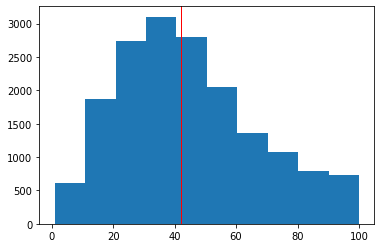

In [56]:
plt.hist(df["title_length"],bins = 10)
plt.axvline(x = 42, color = "r", linestyle = "-", linewidth = 1)

title_length는 평균 44, 범위는 1 ~ 100입니다.  
항목들 중 그나마 극단적으로 치우치지 않은 분포를 보입니다.  
길이가 10~60자 이내인 동영상이 많은 비중을 차지하고 있습니다.  

In [57]:
df.loc[df["title_length"] <= 2]

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,comment_count,description,tag_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,title_length,description_length,treTime-pubTime
30,7yuRQjZzGpU,진심,2020-08-09,UChQ-VMvdGrYZxviQVMTJOHg,People & Blogs,도티 TV,22,2020-08-12,도티|도티 마인크래프트|마인크래프트 도티|마인크래프트|마인크래프트 던전스|마인크래프...,1458857,...,17540,미안하고 감사해요-------------------------------------...,11,0.02,0.01,0.01,0.47,2,67,4 days
874,ItOBzI6b0AM,꾹뚝,2020-08-17,UCaKod3X1Tn4c7Ci0iUKcvzQ,Entertainment,런닝맨 - 스브스 공식 채널,24,2020-08-18,런닝맨|김종국|유재석|이광수|runningman|RunningMan|Runningm...,658934,...,1588,김종국X유재석 모음.zip 《런닝맨 / 예능맛ZIP / RunningMan》야!!카...,45,0.01,0.00,0.00,0.02,2,78,2 days
4062,-771tnJLScs,비밀,2020-09-10,UCFOixeB9gbedVi6uwnsfHMQ,Science & Technology,1분과학,28,2020-09-10,1분과학|과학|도서|다큐|영화|우주|우주다큐,109791,...,1715,1분과학 책 나왔습니다!!만화로 나와서 아주 후루룩 쉽게 넘어가는 책입니다.사셔서 ...,7,0.06,0.00,0.02,0.01,2,804,1 days
39985,SvsdftzxyoA,이발,2021-03-18,UChbE5OZQ6dRHECsX0tEPEZQ,Comedy,장삐쭈,23,2021-03-19,[None],1142752,...,4252,이번주는 휴가로 인한 휴재입니다그냥가기 아쉬워서 짧은거 하나 투척그림 : 안류천편집...,1,0.02,0.00,0.00,0.02,2,59,2 days
60794,N4bn4rHROFA,ㅎ2,2021-06-19,UCiMq04sS1ijeM0tda9OkuQw,People & Blogs,픽셀,22,2021-06-20,애니메이션|픽셀|픽셀네트워크|픽셀스토어|머그컵|굿즈|탬탬버린|김진우|지누|탬탬|버린...,146043,...,461,안녕하세요 픽셀스토어입니다.📢6월 25일 금요일 오후 2시부터 김똘복님의 머그컵 굿...,45,0.04,0.00,0.00,0.01,2,118,2 days
69994,xspFaNJcht4,고백,2021-08-05,UChbE5OZQ6dRHECsX0tEPEZQ,Comedy,장삐쭈,23,2021-08-06,장삐쭈|단편선|이그림체|고백|여사친|남사친|커플|연애|고백연습|연습|전화|통화,948407,...,2776,"그림, 편집 : 안류천더빙 : 장삐쭈",12,0.03,0.00,0.00,0.01,2,20,2 days
71211,Dsb9h49z-f4,👀,2021-08-10,UCt9a_qP9CqHCNwilf-iULag,Sports,PSG - Paris Saint-Germain,17,2021-08-12,paris saint-germain|psg|paris|football|PSG|PAR...,1135266,...,4770,👀🔴🔵🎥 Subscribe to the Paris Saint-Germain chan...,34,0.07,0.00,0.00,0.01,1,167,3 days
75160,8SKcemYNhWo,인사,2021-08-30,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-09-01,[None],384440,...,398,NaN,1,0.03,0.00,0.00,0.02,2,0,3 days
76554,lQm4xEHOHkM,학생,2021-09-07,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-09-08,[None],382726,...,610,NaN,1,0.04,0.00,0.00,0.02,2,0,2 days
81367,IF45OB-RmCw,피자,2021-10-01,UCT3CumbFIJiW33uq0UI3zlg,Howto & Style,고기남자 MeatMan,26,2021-10-02,피자|칩|chip|씬피자|피자만들기|고기남자|피자에어프라이어|밥피자|만두피자|화덕피...,204115,...,1390,피자칩 ...,16,0.03,0.00,0.01,0.09,2,1259,2 days


In [58]:
df.loc[df["title_length"] <= 2].sort_values(by = "likes/view_count", ascending = False)

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,comment_count,description,tag_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,title_length,description_length,treTime-pubTime
71211,Dsb9h49z-f4,👀,2021-08-10,UCt9a_qP9CqHCNwilf-iULag,Sports,PSG - Paris Saint-Germain,17,2021-08-12,paris saint-germain|psg|paris|football|PSG|PAR...,1135266,...,4770,👀🔴🔵🎥 Subscribe to the Paris Saint-Germain chan...,34,0.07,0.00,0.00,0.01,1,167,3 days
4062,-771tnJLScs,비밀,2020-09-10,UCFOixeB9gbedVi6uwnsfHMQ,Science & Technology,1분과학,28,2020-09-10,1분과학|과학|도서|다큐|영화|우주|우주다큐,109791,...,1715,1분과학 책 나왔습니다!!만화로 나와서 아주 후루룩 쉽게 넘어가는 책입니다.사셔서 ...,7,0.06,0.00,0.02,0.01,2,804,1 days
89781,egvWjwiv-2U,사,2021-11-12,UC-YRx5jfreS9abTGxfmV4Hg,People & Blogs,칩chip,22,2021-11-13,[None],179355,...,1208,이메일 shgb6113@gmail.com,1,0.05,0.00,0.01,0.03,1,22,2 days
99569,w6s4ZRTOXvg,공부,2022-01-02,UCyOLeGNo9T_aTNCXfI4mahg,People & Blogs,짧은내복야코,22,2022-01-03,Shorts,159636,...,178,빨간내복야코 채널https://sbsb.kr/redpajamayaco야코 스튜디오빨...,1,0.04,0.00,0.00,0.00,2,82,2 days
89386,aAeOaEGQomE,습관,2021-11-10,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-11-11,[None],905854,...,564,NaN,1,0.04,0.00,0.00,0.02,2,0,2 days
60794,N4bn4rHROFA,ㅎ2,2021-06-19,UCiMq04sS1ijeM0tda9OkuQw,People & Blogs,픽셀,22,2021-06-20,애니메이션|픽셀|픽셀네트워크|픽셀스토어|머그컵|굿즈|탬탬버린|김진우|지누|탬탬|버린...,146043,...,461,안녕하세요 픽셀스토어입니다.📢6월 25일 금요일 오후 2시부터 김똘복님의 머그컵 굿...,45,0.04,0.00,0.00,0.01,2,118,2 days
76554,lQm4xEHOHkM,학생,2021-09-07,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-09-08,[None],382726,...,610,NaN,1,0.04,0.00,0.00,0.02,2,0,2 days
88565,Ruke-aOqLEE,가족,2021-11-05,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-11-07,[None],1568187,...,936,NaN,1,0.03,0.00,0.00,0.03,2,0,3 days
86993,wRVEphW0tqU,가족,2021-10-29,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-10-30,[None],800575,...,430,NaN,1,0.03,0.00,0.00,0.03,2,0,2 days
75160,8SKcemYNhWo,인사,2021-08-30,UC9sKsado8YOC8J52g6yu4Tw,Comedy,가나쌍둥이Ghana Twins,23,2021-09-01,[None],384440,...,398,NaN,1,0.03,0.00,0.00,0.02,2,0,3 days


제목길이가 2인 인기동영상은 20개 입니다.  
likes/view_count 평균이 0.02인 것을 고려했을 때, likes/view_count의 비율이 높은 편 입니다.


#### description_length

In [59]:
summary_numeric("description_length")

description_length
평균          389.04
최소            0.00
중앙          267.00
최대        4,920.00


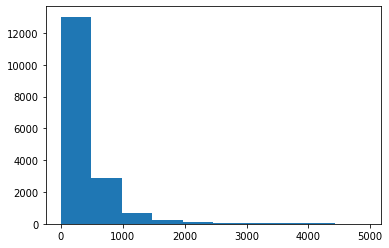

In [60]:
plt.hist(df["description_length"],bins = 10);

description_length는 평균 389, 범위는 0 ~ 4,920  
길이가 500 이하인 데이터가 대부분입니다.

In [61]:
df[["video_id", "title", "channelTitle", "category", "view_count", "likes", "dislikes", "comment_count", "tag_count", "description_length"]].sort_values(by = ["description_length"], ascending = [False]).head(10)

,video_id,title,channelTitle,category,view_count,likes,dislikes,comment_count,tag_count,description_length
429,T3p7iEf-Lo8,댓글에 대한 답변과 향후 계획에 대해 드릴 말씀이 있습니다.,디렉터 파이,People & Blogs,213882,5003,486,1481,1,4920
1415,BYn8M-tk88k,BTS (방탄소년단) 'Dynamite' Official MV 🧨💜 SISTERS ...,sillypak,People & Blogs,123260,11261,359,1056,33,4894
73977,mglxbnccbeo,오늘도 '생수' 마셨는데…알고보니 수질 '부적합'/[신선미의 똑똑한 소비자 리포트]...,한국경제TV뉴스,News & Politics,88067,1171,39,399,67,4858
5455,lAOk49dlwnE,최강욱 대권후보로 만들어라 무섭게 올라오는 3등정당의 미래가 보인다는 박시영 도사,KBS더라이브,News & Politics,123468,7272,114,457,30,4852
7118,56UjWV_x18w,MBN 뉴스파이터-보이스트롯 준우승 김다현 김봉곤 훈장 딸 아닌 김다현 아버지라 불...,MBN News,News & Politics,341449,4711,267,457,9,4834
13151,8EpcKXbkmcU,BTS - Dynamite (방탄소년단 다이너마이트) | One Voice Chil...,One Voice Children's Choir,Music,801074,56019,308,4590,21,4792
80955,3YqPKLZF_WU,Coldplay X BTS - My Universe (Official Video),Coldplay,Music,9182529,2247385,6086,209859,27,4722
82577,Z5-6wbdbgA4,"김밥의 수많은 속재료가 부담된다면? '이것'만 준비하세요, 간단하게 김밥 맛집 흉내...",백종원의 요리비책 Paik's Cuisine,People & Blogs,366736,5993,131,246,14,4707
53242,gMaB-fG4u4g,전신 다이어트 최고의 운동 [칼소폭 찐 핵핵매운맛],Thankyou BUBU,Howto & Style,518264,16516,182,2437,10,4531
992,TIc-xNWxD-U,팔뚝살 최고의 운동 [팔뚝살 핵매운맛],Thankyou BUBU,Howto & Style,110193,6315,89,501,12,4517


다른 속성들의 상위 동영상들과 달리, description_length 상위에 있는 동영상들은  
제품 혹은 뉴스, 요리, 운동등의 영상에 대한 자세한 내용이 필요한 경우인 것으로 확인 된다.


#### 하루 평균 인기 동영상의 개수

In [62]:
import matplotlib
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import matplotlib.pyplot as plt   #그래프 그리기 위한 라이브러리
%matplotlib inline  

#폰트 경로 가져오기
font_path = 'C:/Windows/Fonts/gulim.ttc'
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#폰트 설정하기
matplotlib.rc('font',family=font_name)

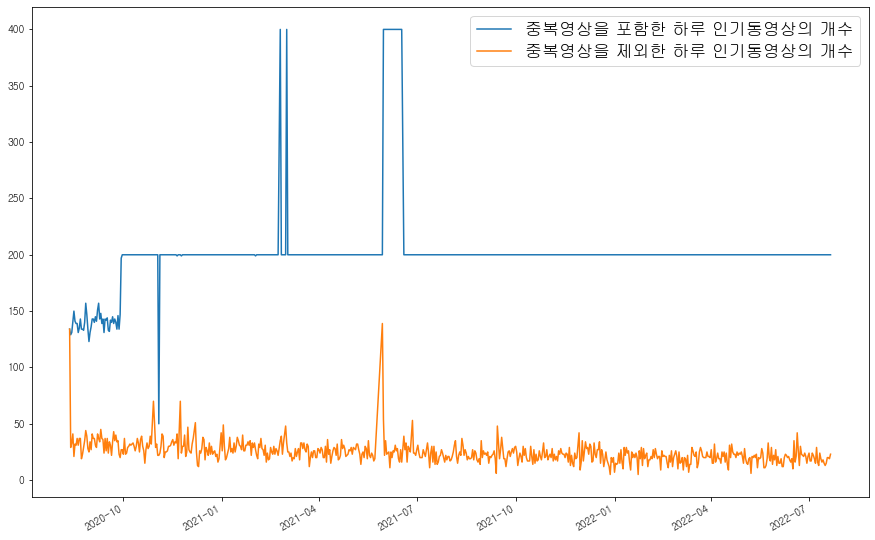

In [63]:
import matplotlib.patches as mpatches

plt.figure(figsize = (15,10));
data["trending_date"].value_counts().plot(label = "중복영상을 포함한 하루 인기동영상의 개수")
df["trending_date"].value_counts().plot(label = "중복영상을 제외한 하루 인기동영상의 개수")

plt.legend(prop = {"size":17});


In [64]:
print("중복영상을 포함한 하루 인기동영상의 개수")
print("평균 : {:.2f}개".format(data["trending_date"].value_counts().mean()))
print("최대 : {:.2f}개".format(data["trending_date"].value_counts().max()))
print("최소 : {:.2f}개".format(data["trending_date"].value_counts().min()))

print("중복영상을 제외한 하루 인기동영상의 개수")
print("평균 : {:.2f}개".format(df["trending_date"].value_counts().mean()))
print("최대 : {:.2f}개".format(df["trending_date"].value_counts().max()))
print("최소 : {:.2f}개".format(df["trending_date"].value_counts().min()))

중복영상을 포함한 하루 인기동영상의 개수
평균 : 201.38개
최대 : 400.00개
최소 : 50.00개
중복영상을 제외한 하루 인기동영상의 개수
평균 : 24.69개
최대 : 139.00개
최소 : 5.00개


하루 평균 201개 정도의 영상이 인기동영상에 포함되고, 50~400의 범위를 가지네요.  

#### 게시되고 어느 정도 지나서 인기 영상에 갔는가

In [65]:
df["treTime-pubTime"].describe()

count                        17108
mean     2 days 06:05:08.066401683
std      0 days 22:19:45.088500273
min                1 days 00:00:00
25%                2 days 00:00:00
50%                2 days 00:00:00
75%                2 days 00:00:00
max               23 days 00:00:00
Name: treTime-pubTime, dtype: object

인기동영상들은 동영상을 평균적으로 게시하고 다음 날 인기동영상이 되었습니다.  
빠르면 당일에 인기동영상이 되네요.

In [66]:
pd.cut(df["treTime-pubTime"],[timedelta(days = 0),timedelta(days = 1),timedelta(days = 2),timedelta(days = 3),timedelta(days = 22)]).value_counts(sort = False,normalize = True)

(0 days 00:00:00, 1 days 00:00:00]    0.08
(1 days 00:00:00, 2 days 00:00:00]    0.73
(2 days 00:00:00, 3 days 00:00:00]    0.12
(3 days 00:00:00, 22 days 00:00:00]   0.08
Name: treTime-pubTime, dtype: float64

게시 후  
당일에 인기동영상이 되는 경우가 8%  
2일째에 인기동영상이 되는 경우가 73%  
3일 이내에 인기동영상이 되는 경우가 92%입니다. 게시 후 3일 이내에 인기동영상이 되지 못하면, 인기 동영상이 되기 힘들다고 보입니다.  

In [67]:
df.loc[df["treTime-pubTime"] > timedelta(days = 15)].sort_values(by = "treTime-pubTime", ascending = False) 

,video_id,title,publishedAt,channelId,category,channelTitle,categoryId,trending_date,tags,view_count,...,comment_count,description,tag_count,likes/view_count,dislikes/view_count,comment_count/view_count,dislikes/likes,title_length,description_length,treTime-pubTime
91004,wqWPta2dQiE,Bad Habits,2021-10-28,UClmXPfaYhXOYsNn_QUyheWQ,Music,Ed Sheeran - Topic,10,2021-11-19,Ed Sheeran|=|Bad Habits,1510130,...,0,Provided to YouTube by Atlantic Records UKBad ...,3,0.01,0.00,0.00,0.04,10,783,23 days
24805,Q43H2qByZi4,돈이 움직이는 원리를 알면 돈이 보인다. 홍익희 작가 #TV특강 #스미다,2020-12-15,UCTqenvDOOdnJz6tcAXtJsZw,Entertainment,안동MBC PLUS,24,2021-01-02,안동MBC,36809,...,40,우리 삶에 꼭 필요한 수업 #TV특강 #수업 #강의 #MBC #스미다돈이 움직이는 ...,1,0.03,0.00,0.00,0.03,40,67,19 days


게시 후 15일이 지나 인기동영상이 된 사례들입니다. 자세한 사유는 모르겠습니다.

 #### category 별 동영상의 수

In [68]:
print("전체 데이터 {}개\ncategory 개수 {}개\n".format(len(df),len(df["category"].unique())))
for i in range(len(df["category"].value_counts())):
    print("{:23} {:4} {:.2f}".format(df["category"].value_counts().index[i],
                            df["category"].value_counts().values[i],
                            df["category"].value_counts(normalize = True).values[i]))

전체 데이터 17108개
category 개수 15개

Entertainment           5892 0.34
People & Blogs          2555 0.15
Music                   1852 0.11
Sports                  1438 0.08
News & Politics         1107 0.06
Comedy                   993 0.06
Howto & Style            649 0.04
Gaming                   639 0.04
Film & Animation         561 0.03
Education                338 0.02
Pets & Animals           327 0.02
Science & Technology     295 0.02
Travel & Events          224 0.01
Autos & Vehicles         206 0.01
Nonprofits & Activism     32 0.00


category 별 인기동영상의 개수를 확인해본 결과입니다.  
1위는 Entertainment으로 5892개 34%  
2위는 People & Blogs으로 2555개 15%  
3위는 Music으로 1852개 11%  

3개의 카테고리가 70%를 차지하네요.  
위의 3가지 카테고리에 속한 카테고리를 사람들이 많이 조회한다고 보입니다.  

In [69]:
for cate in df["category"].value_counts().index[0:3]:
    print(cate, df["treTime-pubTime"].loc[df["category"] == cate].mean())

Entertainment 2 days 06:47:54.134419551
People & Blogs 2 days 06:49:10.450097847
Music 2 days 09:08:09.848812095


3가지 카테고리 다 평균 2일 째에 인기동영상이 됩니다.

#### 채널 별 상황은 어떠한가

In [70]:
print("전체 데이터 개수 {} 포함된 채널의 수 {}".format(len(df), len(df["channelTitle"].unique()))) 

전체 데이터 개수 17108 포함된 채널의 수 3010


In [71]:
df_pivot=pd.pivot_table(df, index = ["channelTitle"], 
                    values = ["view_count"],
                    aggfunc = ["count", "mean"])

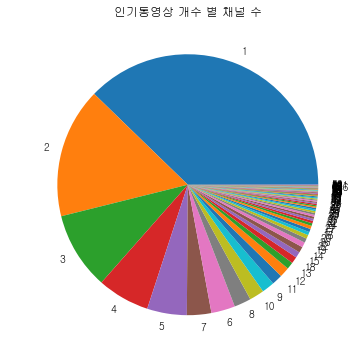

In [72]:
df_pivot["count"]["view_count"].value_counts().plot(kind = "pie",title = "인기동영상 개수 별 채널 수",label = " ",figsize = (6, 6));

In [73]:
df["category"].loc[df["channelTitle"].isin(df_pivot[df_pivot["count"]["view_count"] == 1].index)].value_counts()

Entertainment            250
People & Blogs           227
Music                    173
Gaming                    86
Howto & Style             73
Sports                    58
News & Politics           51
Film & Animation          48
Education                 40
Comedy                    31
Pets & Animals            27
Science & Technology      25
Autos & Vehicles          25
Travel & Events           17
Nonprofits & Activism      5
Name: category, dtype: int64

인기동영상 개수가 1개인 채널의 카테고리 현황입니다.  
Entertainment, People & Blogs의 비중이 각각 1,2위입니다.  
News & Politics 카테고리는 생각보다 작은 7위이네요.  

In [74]:
df["category"].loc[df["channelTitle"].isin(df_pivot[(df_pivot["count"]["view_count"] >= 2) & (df_pivot["count"]["view_count"] < 4)].index)].value_counts()

Entertainment            512
People & Blogs           369
Music                    206
Gaming                   127
Sports                   114
Comedy                    87
News & Politics           68
Pets & Animals            60
Film & Animation          59
Howto & Style             59
Education                 57
Science & Technology      47
Travel & Events           34
Autos & Vehicles          29
Nonprofits & Activism     11
Name: category, dtype: int64

인기동영상 개수가 2~3개인 채널의 카테고리 현황입니다.  
마찬가지로 Entertainment, People & Blogs의 비중이 각각 1,2위입니다.  
Comedy가 10위에서 6위까지 올라오네요.

In [75]:
df["category"].loc[df["channelTitle"].isin(df_pivot[df_pivot["count"]["view_count"] >= 4].index)].value_counts()

Entertainment            5130
People & Blogs           1959
Music                    1473
Sports                   1266
News & Politics           988
Comedy                    875
Howto & Style             517
Film & Animation          454
Gaming                    426
Education                 241
Pets & Animals            240
Science & Technology      223
Travel & Events           173
Autos & Vehicles          152
Nonprofits & Activism      16
Name: category, dtype: int64

인기동영상 개수가 4개 이상인 채널의 카테고리 현황입니다.  
이전의 결과들과 다르게 Entertainment 카테고리가 가장 많은 비중을 차지합니다.  
그 다음은 People & Blogs가 2위이고, Music이 3번째로 많은 비중을 차지합니다.  

People & Blogs 카테고리의 동영상을 다루는 채널들은 모든 범위에서 인기동영상에 많이 선정된다고 보이고,  
Entertainment 카테고리의 동영상을 다루는 채널들이 다른 카테고리 채널들에 비해, 인기동영상에 많이 선정된다고 보입니다.  

### 조회수와 연관이 있는 항목들은 무엇인가

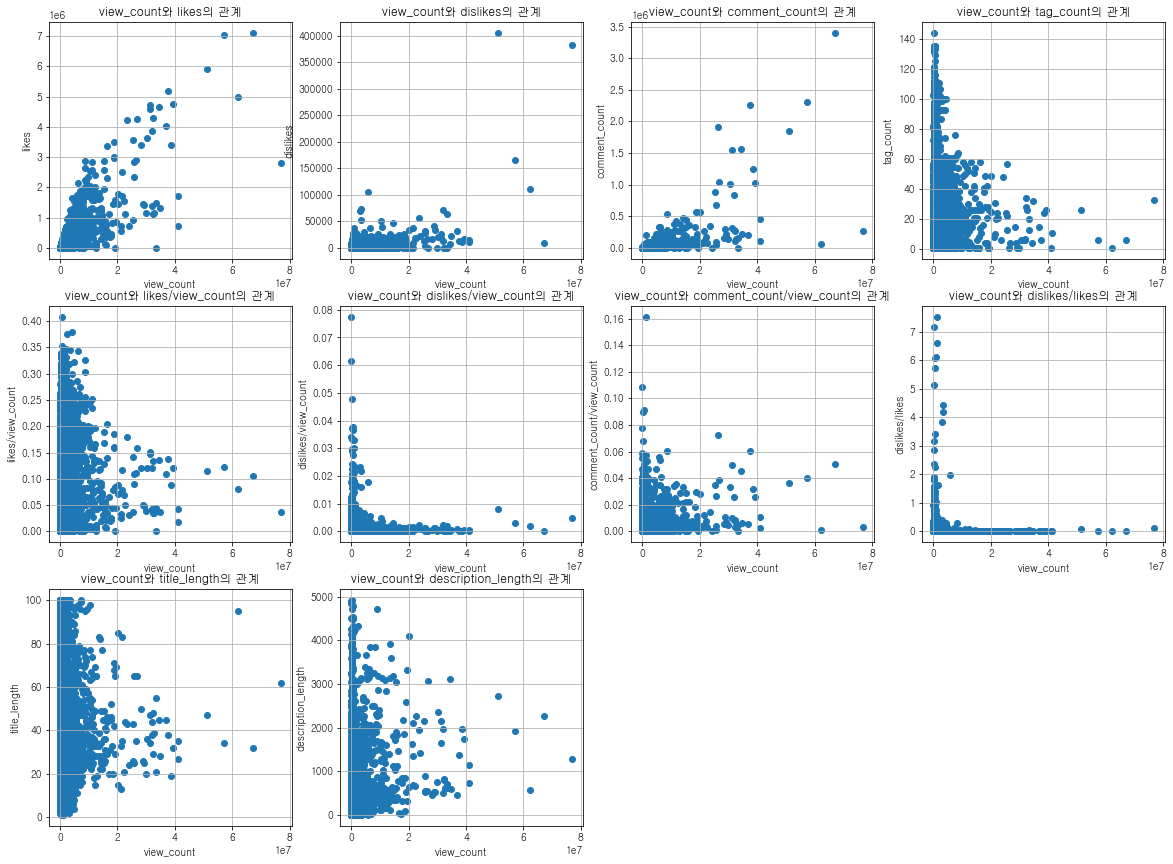

In [76]:
plt.figure(figsize = (20, 20))

for i in range(1, len(df.describe().columns) - 1 ):
    plt.subplot(4, 4, i)
    plt.title("view_count와 {}의 관계".format(df.describe().columns[i]))
    plt.xlabel("view_count")
    plt.ylabel(df.describe().columns[i])
    plt.scatter(x = df["view_count"], y = df[df.describe().columns[i]])
    plt.grid()

조회수에 영향을 주는 항목들이 무엇인지 알아보기 위한 산점도입니다.  
소수의 조회수 상위 항목들에 의해 그래프의 분포가 영향을 받는 것 같습니다.  
조회수 상위 데이터(조회수 백만 이상 데이터 570개)를 제외하고 그래프를 그려보겠습니다.  

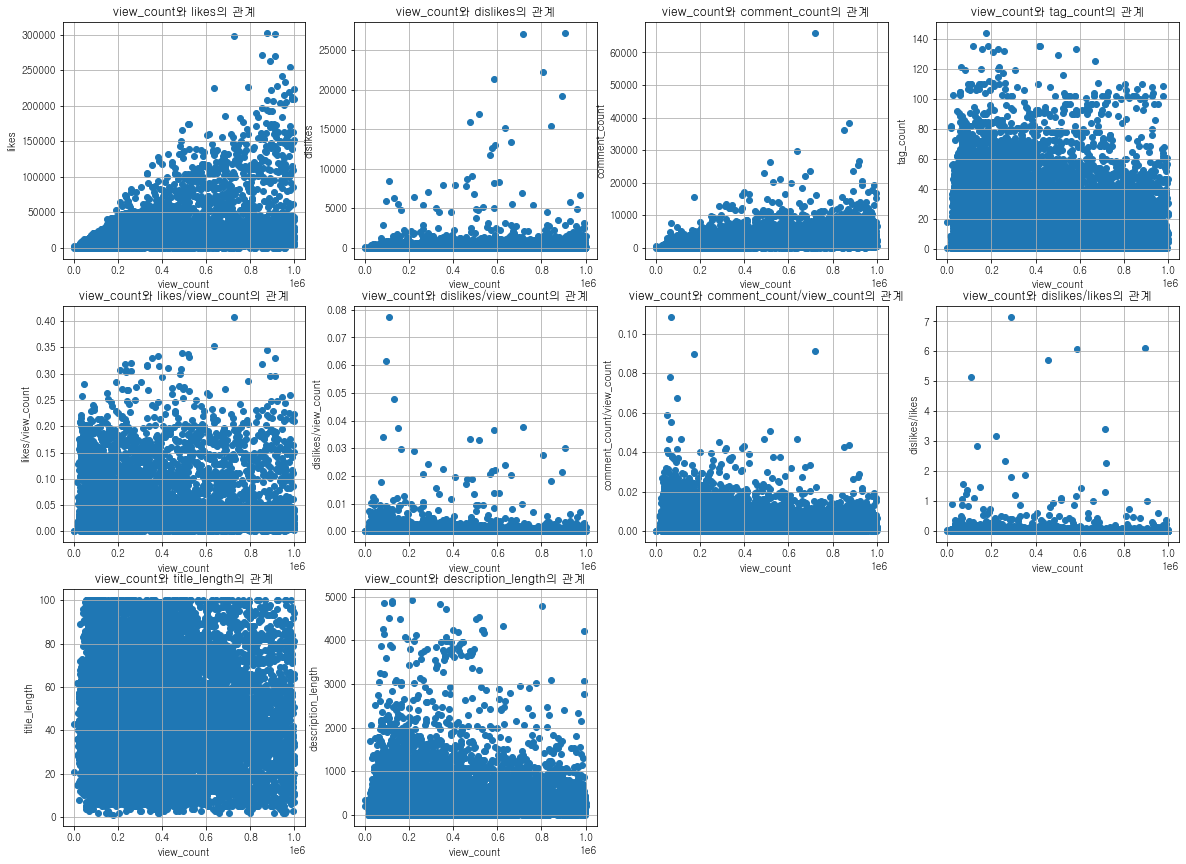

In [77]:
plt.figure(figsize = (20, 20))

for i in range(1, len(df.describe().columns) - 1 ):
    plt.subplot(4, 4, i)
    plt.title("view_count와 {}의 관계".format(df.describe().columns[i]))
    plt.xlabel("view_count")
    plt.ylabel(df.describe().columns[i])
    plt.scatter(x = df["view_count"].loc[df["view_count"] <= 1000000], y = df[df.describe().columns[i]].loc[df["view_count"] <= 1000000])
    plt.grid()

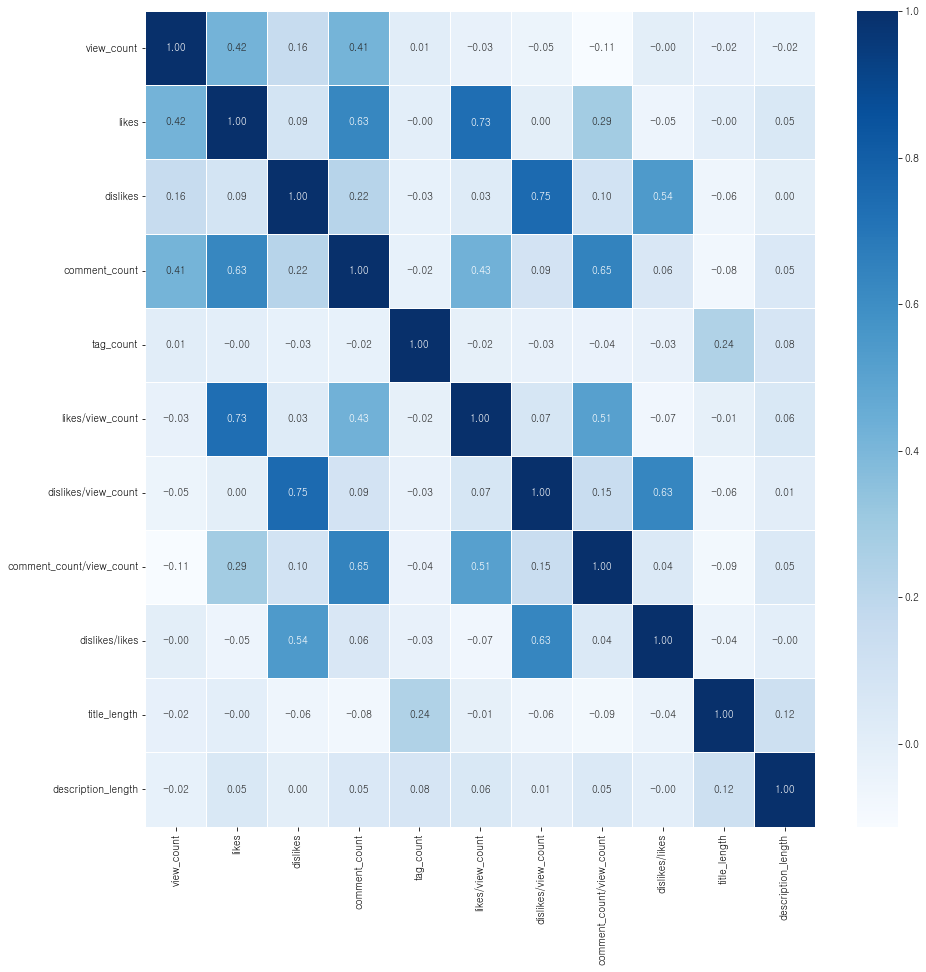

In [78]:
plt.figure(figsize = (15,15))
sns.heatmap(data = df.loc[df["view_count"] <= 1000000].corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues");

조회수 상위 데이터를 제외한 상관관계입니다.  
likes, dislikes, comment_count가 각각 0.42, 0.16, 0.41의 상관관계를 가진다고 나타났습니다.  
다만 좋아요와 싫어요를 누르거나 댓글을 남기려면 먼저 동영상을 조회해야하기 때문에,  
조회수가 likes, dislikes, comment_count에 영향을 준다고 해석해야 합니다.  

tag_count, title_length, description_length가 view_count와 상관관계가 있지 않을까 생각했었는데, 관계가 없는 것으로 나타났습니다.  

### 결론

지금까지 인기 동영상들의 전반적인 상황을 살펴봤습니다.  
분석의 목적인 "채널의 방향을 어떻게 잡아야 인기 동영상에 갈 수 있나"를 고려했을 때, 시사점은 다음과 같습니다.  

시사점  

인기동영상에 게시된 동영상들은 조회수 30만 이하의 영상이 대부분이고, 조회수가 가장 적은 영상은 14,209이다.  
3일 이내에 인기동영상이 되지 못하면, 인기 동영상이 되기 힘들다고 보인다.  
인기 동영상의 70%는 Entertainment, People & Blogs, Music의 카테고리에 속한다.  
Entertainment 카테고리 동영상을 다루는 채널들은, 채널 별 인기동영상의 개수를 기준으로 보면, 모든 범위에서 많은 비중을 차지한다.  
참고: 좋아요와 댓글수를 늘릴 때 상품이 큰 영향을 준다.  

전략  

채널은 Entertainment, People & Blogs, music 의 3개 카테고리의 동영상을 다뤄야하며, 그 중에서 Entertainment 카테고리가 가장 유리함.  
태그 개수는 조회수와 크게 상관이 없는 것으로 보이나, 대부분의 인기동영상은 10개 정도 사용함.  
제목의 길이는 조회수와 크게 상관이 없는 것으로 보이나, 대부분의 인기동영상은 10~60자 정도의 제목을 사용함.  
설명의 길이는 조회수와 크게 상관이 없는 것으로 보이나, 대부분의 인기동영상은 500자 이내의 설명을 사용함.  
3일 이내로 조회수 최소 2,000을 넘기지 못했다면 다음 동영상을 준비해야함.  
돈이 된다면 광고를 하더라도 인기 동영상에 선정 될 수 있음.  